# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-09-06 09:00:04.206811


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/5/20


,9/5/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,6244970,188538,3.02
Brazil,4123000,126203,3.06
India,4113811,70626,1.72
Mexico,629409,67326,10.70
United Kingdom,346513,41638,12.02
Italy,276338,35534,12.86
France,347267,30730,8.85


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 9/5/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
39441,US,6150016,2020-09-03,186790.0,1070.0,36506.0,40318.714286
39440,US,6113510,2020-09-02,185720.0,1056.0,39670.0,41670.142857
39439,US,6073840,2020-09-01,184664.0,1067.0,43253.0,42304.285714
39438,US,6030587,2020-08-31,183597.0,573.0,34156.0,41578.714286
39437,US,5996431,2020-08-30,183024.0,310.0,35337.0,42112.285714
39436,US,5961094,2020-08-29,182714.0,958.0,47153.0,42003.428571
39435,US,5913941,2020-08-28,181756.0,971.0,46156.0,41638.714286


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/5/20


,9/5/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,438772,32987.0,7.52
New Jersey,193747,15985.0,8.25
California,735314,13709.0,1.86
Texas,655815,13576.0,2.07
Florida,643867,11811.0,1.83
Massachusetts,122196,9116.0,7.46
Illinois,250102,8385.0,3.35


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 9/5/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1365,California,726018,2020-09-03,13493.0,176.0,4737.0,4885.285714
1364,California,721281,2020-09-02,13317.0,167.0,5664.0,4896.714286
1363,California,715617,2020-09-01,13150.0,128.0,3142.0,4940.714286
1362,California,712475,2020-08-31,13022.0,85.0,6524.0,5273.428571
1361,California,705951,2020-08-30,12937.0,43.0,3913.0,5238.714286
1360,California,702038,2020-08-29,12894.0,89.0,4653.0,5371.857143
1359,California,697385,2020-08-28,12805.0,128.0,5564.0,5497.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 9/5/20


,9/5/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,247542,6000.0,2.42
Riverside,53987,1067.0,1.98
Orange,49509,1051.0,2.12
San Bernardino,49325,765.0,1.55
San Diego,40342,704.0,1.75
San Joaquin,18438,368.0,2.00
Sacramento,18813,327.0,1.74


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 9/5/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4329,Los Angeles,244999,2020-09-03,5932.0,54.0,1064.0,1144.714286
4328,Los Angeles,243935,2020-09-02,5878.0,49.0,1414.0,1221.285714
4327,Los Angeles,242521,2020-09-01,5829.0,45.0,753.0,1249.142857
4326,Los Angeles,241768,2020-08-31,5784.0,15.0,1019.0,1267.857143
4325,Los Angeles,240749,2020-08-30,5769.0,10.0,993.0,1293.428571
4324,Los Angeles,239756,2020-08-29,5759.0,27.0,1298.0,1299.142857
4323,Los Angeles,238458,2020-08-28,5732.0,31.0,1472.0,1343.428571
4322,Los Angeles,236986,2020-08-27,5701.0,38.0,1600.0,1377.142857
4321,Los Angeles,235386,2020-08-26,5663.0,58.0,1609.0,1365.571429
4320,Los Angeles,233777,2020-08-25,5605.0,47.0,884.0,1381.714286



7 day new US cases as of 9/5/20


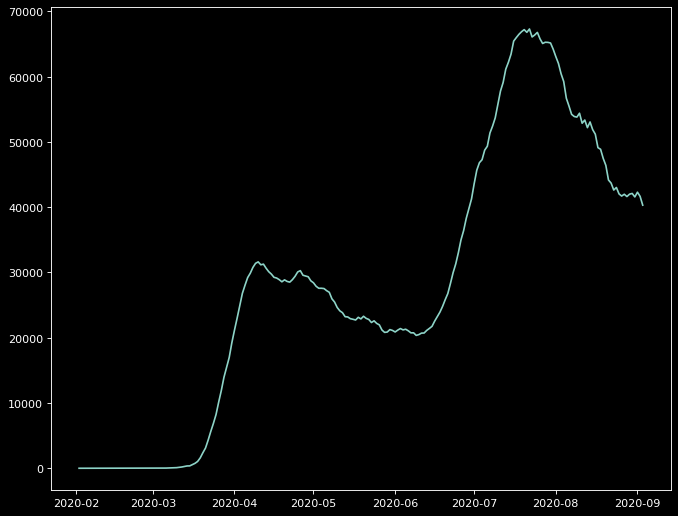

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 9/5/20


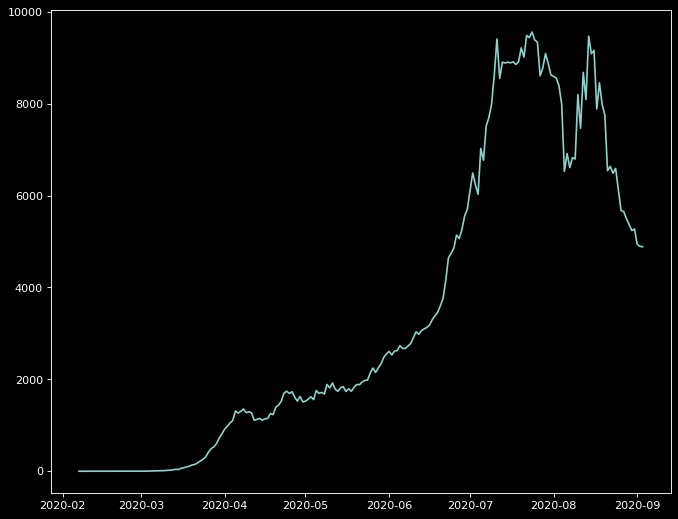

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 9/5/20


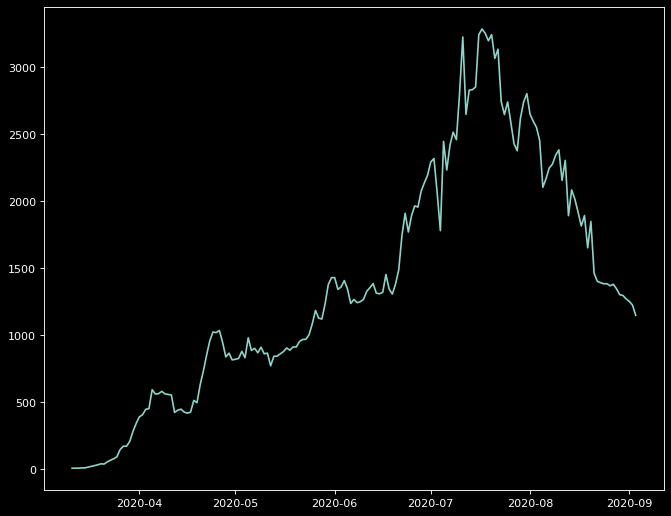

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()